# Introduction to data science

## Approximation of the kinetic energy functional through the electron density with the help of mashine learning

Group Members :
1. Alina Umerbekova
2. Johannes Tölle
3. Rupali Chawla

### Table of contents


1. [Introduction](#introduction)
2. [Motivation](#paragraph1)
3. [Computational details](#paragraph2)
4. [Approximations and limitations](#paragraph3)
5. [Analysis](#paragraph4)
6. [Conclusion](#paragraph5)

### Introduction <a name="introduction"></a>

Basis for quantum chemistry is the Schrödinger equation:

$H \Psi = E \Psi$

**Problem: ** Only solvable analytically for one electron systems

This is the reason why different attempts are carried out using different approximations to calculate ground state energies of electronic structures. A variety of system properties can be obtained from the electronic ground state. Therefore, methods which are using the electron density instead of the wavefunction are established in theoretical chemistry and physics (**D**ensity **F**unctional **T**heory = **DFT**).


Formal base for this approach is done through the Hohenberg-Kohn-Theorems which states that employing the electron density instead of wavefunctions lead to the same ground state energy. 

> https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864

In theory, linear scaling of the computational cost with a 'density only' approach (so called: orbital free DFT) can be realized. This is ideal to tackle large systems. 

The main problem which comes with this approach is the calculation of the kinetic energy. So far there is no statisfying expression or approximation available to calculate the kinetic energy through the electron density alone. For this reason Kohn and Sham reintroduced the one electron wavefunction in the KS-DFT approach (for noninteracting systems) (1964, Nobel Prize: 1989).

> https://journals.aps.org/pr/abstract/10.1103/PhysRev.140.A1133

This method delivers statisfactory results for a variety of systems with a cubic scaling in the computational cost. For large systems like Proteins, DNA etc. this is too expensive. For this reason chemists and physicists are trying to find new approaches and approximations to get access to larger systems.

### Motivation: <a name="paragraph1"></a>

The motivation of this project is to use machine learning to calculate the kinetic potential $v_\mathrm{kin}$ from the electron density $\rho$. By achieving this we would be able to significantly reduce the computational complexity for computing the noninteracting kinetic energy functional - a fundamental ingredient of computational materials science.

This will have an immense impact in the field of chemistry and material science because it would open the door to modeling materials of realistic dimensions and complexity which are currently not approachable by the state-of-the-art methods (such as KS-DFT).

### Computational details: <a name="paragraph2"></a>

The electron densities $\rho(r)$ and the non interacting kinetic energy potentials $v_\mathrm{kin}(r)$ are calculated using eQE(embedded Quantum Espresso, developed in Pavanello Research Group, PRG). eQE is a software package for calculation of material properties based on the KS-DFT formalism.

In this project we work with different arrangements of Aluminium (Al) atoms inside a cubic unit cell. In the case of eQE, periodic boundary conditions are applied by a plane wave expansion.

> http://eqe.rutgers.edu/

Physical meaningful arrangements of Al are obtained using the calypso software. In our case we have calculated 100 different structures of two Al atoms placed at different positions in a cubic unit cell with constant cell size.

> http://www.calypso.cn/

For each system the $v_\mathrm{kin}(r)$ and $\rho$ are printed out at the end of the calculation. Both are represented with their value on a gridpoint in 3D space (in our case: 50 x 50 x 50). This leads to a total data set of 100 X 12500 datapoints. 

For reading and manipulation of the quantities we used pbcpy (package for post processing eQE files, developed in PRG).

> https://gitlab.com/ales.genova/pbcpy

__Input parameters for the eQE calcuations:__


* Ecutwfc = 70
* Ecutrho = 400
* XC-Functional = PZ (LDA)
* Cubic unit cell with a = 4.026 Å (constant)
* K-Points: 8 8 8 0 0 0
* 2 Al- atoms per unit cell (position varies)
* local pseudopotentials are used (created by Dr. Wenhui Mi)


__Computational details:__

* calculation performed on Newark Massive Memory Machine (nm3)
* 20 cores, 1 node

Example structure:

<img align="center" src="pictures_presentation/Al_structure.png" width = "700">

**Fig. 1:** Example structure of Al in the cubic unit cell (Structure 1)

Example of 2D cutplane of the

a) **Density:**

In [1]:
# import libraries and dependencies:
import numpy as np
import matplotlib.pyplot as plt
from pbcpy.base import Coord
from pbcpy.system import System
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
import matplotlib as mpl

In [2]:
# Read in output format of eQE:
al_dens = PP('pictures_presentation/Al_1_0_fde_0rho.pp').read()
al_vt = PP('pictures_presentation/Al_1_0_vt_rhotot_alph.pp').read()

In [3]:
# initialising startposition of plane and vectors to define cut plane:
x0 = Coord(pos=[0.0,0.0,7.6080], cell=al_dens.cell)
r0 = 2*Coord(pos=[0.0,7.6080,0.0], cell=al_dens.cell)
r1 = 2*Coord(pos=[7.6080,0.0,0.0], cell=al_dens.cell)
# Number of Gridpoints:
gridpoints = 4000
# initializing cutplane:
plotcut_2D_al_dens = al_dens.plot.get_plotcut(x0=x0,r0=r0,r1=r1)
XSF('pictures_presentation/Al_dens_2D.xsf').write(system=al_dens, plot=plotcut_2D_al_dens)

(11, 11) 121


<figure>
    <img align="left" src="pictures_presentation/Al_dens_2D.png" width = "500"> <img align="center" src="pictures_presentation/Al_dens_2D_thermometer.png" width = "150">
    <figcaption align = "center">**Fig. 2:** Example 2D cut plane of the electron density $\rho$ for Al in the cubic unit-cell (Structure 1)</figcaption>
</figure>


b) **Kinetic potential**

In [4]:
# initialising startposition of plane and vectors to define cut plane:
x1 = Coord(pos=[0.0,0.0,7.6080], cell=al_vt.cell)
r2 = 2*Coord(pos=[0.0,7.6080,0.0], cell=al_vt.cell)
r3 = 2*Coord(pos=[7.6080,0.0,0.0], cell=al_vt.cell)
# Number of gridpoints:
gridpoints = 4000
# initializing cutplane:
plotcut_2D_al_vt = al_vt.plot.get_plotcut(x0=x1,r0=r2,r1=r3)
XSF('pictures_presentation/Al_vt_2D.xsf').write(system=al_vt, plot=plotcut_2D_al_vt)

(11, 11) 121


<figure>
     <img align="left" src="pictures_presentation/Al_vt_2D.png" width = "500"> <img align="center" src="pictures_presentation/Al_vt_2D_thermometer.png" width = "180">
    <figcaption align = "center">**Fig. 3:** Example 2D cut plane of the kinetic potential $v_{\mathrm{kin}}$ for Al in the cubic unit cell (Structure 1)</figcaption>
</figure>

For the prediction of the $v_\mathrm{kin}(r)$ through $\rho(r)$ different machine learning algorithms are used. The algorithms are applied through the scikit-learn library and tensorflow for the python programming language.

> http://scikit-learn.org/stable/

> https://www.tensorflow.org/

### Approximations and limitations  <a name="paragraph3"></a>

The transferability of the kinetic energy functional is dictated by the generality of the training dataset.

We are exploring the capability of mashine learning models to predict the noninteracting Kinetic Energy functional.

Our accuracy is bounded to the size of the dataset. However it is possible to expand our dataset to an inifinite limit. 

We have to clarify that even though we are able to predict the noninteracting Kinetic Energy functional, there are still some approximations due to KS-DFT.

###  Analysis  <a name="paragraph5"></a>


In a first step we created the inputfiles for the calculation based on the generated structures with calypso. In a next step we performed 100 calculation.

To verify that all calculations are converged and to see in which region the zeropoint energies from the calculations are lying we are showing them below.

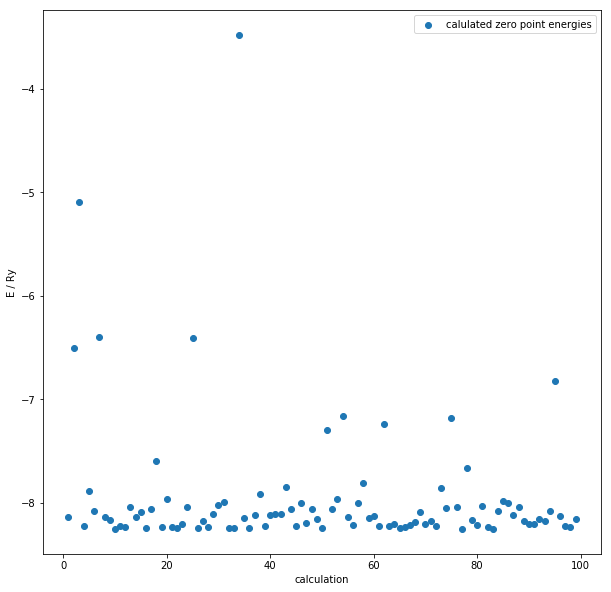

In [5]:
mpl.rcParams['figure.figsize'] = (10,10)

energies = np.array([-8.13482353,-6.50619418,-5.09316851,-8.22393079,-7.89099563,-8.08427768,-6.40453155,-8.14095297,-8.16792407,-8.25002850,
-8.22296361,-8.23439499,-8.04212448,-8.14034268,-8.09230844,-8.24155306,-8.06151388,-7.59712525,-8.23436191,-7.96346353,
-8.23260425,-8.24982469,-8.20354353,-8.04122992,-6.41108775,-8.24099695,-8.17493481,-8.23446189,-8.11387842,-8.02735657,
-7.99282393,-8.24082825,-8.24128382,-3.48678226,-8.14436661,-8.24980329,-8.11832954,-7.91379684,-8.22757841,-8.12030435,
-8.11446690,-8.11042646,-7.84704541,-8.06016240,-8.22928675,-8.00081645,-8.19736624,-8.06502063,-8.15508698,-8.24504574,
-7.29400529,-8.05986289,-7.96158826,-7.16093781,-8.13764364,-8.21972231,-8.00183475,-7.80565283,-8.15007506,-8.12794035,
-8.22292534,-7.23889651,-8.22561208,-8.20486874,-8.24281293,-8.23910297,-8.21867404,-8.18667301,-8.09476559,-8.21079785,
-8.17742178,-8.22483675,-7.85814093,-8.04814573,-7.18692114,-8.04412179,-8.25014193,-7.66929481,-8.17118255,-8.21141033,
-8.02965108,-8.23502385,-8.24999973,-8.07923551,-7.98787221,-8.00227612,-8.12435247,-8.04577061,-8.18018633,-8.20451358,
-8.20865945,-8.16263903,-8.17560216,-8.08536421,-6.82796216,-8.13240267,-8.22223420,-8.23817031,-8.15552265])
plt.scatter(np.arange(1,100,1),energies, label = 'calulated zero point energies')
plt.xlabel('calculation')
plt.ylabel('E / Ry')
plt.legend()
plt.show()

In the next step we are getting our data and arange it in a way which is suitable for further analysis. For this purpose we are using pbcpy to read in the '.pp'(post-processing format) -fileformat from eQE. 

In [6]:
# Specifying the number of performed calculations
number_of_rows = 100
total_number_of_gridpoints = 125000

In [7]:
# Import packages
from pbcpy.base import Cell
from pbcpy.grid import Grid
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space

In [8]:
# Initializing arrays which are going to be filled with the data
data_dens = np.zeros((number_of_rows,total_number_of_gridpoints))
data_vt = np.zeros((number_of_rows,total_number_of_gridpoints))

# Looping over the performed calculations and read the files
for i in range(1,number_of_rows+1):
    print(i)
    density = PP('Densities2/Al_'+str(i)+'_0_fde_0rho.pp').read()
    kin_pot = PP('Potentials2/Al_'+str(i)+'_0_vt_rhotot_alph.pp').read()
    
    rho = density.plot
    v_t = kin_pot.plot
    
    # Creating a gridspace with the dimensions of our data
    grid_real_rho = Grid_Space(rho.grid.at,rho.grid.nr)
    grid_real_vt = Grid_Space(v_t.grid.at,v_t.grid.nr)

    # Putting the value of the density/ kinetic potential on the points in gridspace
    mydens = Grid_Function(grid_real_rho,griddata_3d=rho.values)
    myvt = Grid_Function(grid_real_vt,griddata_3d=v_t.values)
    
    # converting 3D array to 1D array
    data_dens[i-1] = mydens.get_values_flatarray()
    data_vt[i-1] = myvt.get_values_flatarray()

1
(50, 50, 50) 125000
(50, 50, 50) 125000
2
(50, 50, 50) 125000
(50, 50, 50) 125000
3
(50, 50, 50) 125000
(50, 50, 50) 125000
4
(50, 50, 50) 125000
(50, 50, 50) 125000
5
(50, 50, 50) 125000
(50, 50, 50) 125000
6
(50, 50, 50) 125000
(50, 50, 50) 125000
7
(50, 50, 50) 125000
(50, 50, 50) 125000
8
(50, 50, 50) 125000
(50, 50, 50) 125000
9
(50, 50, 50) 125000
(50, 50, 50) 125000
10
(50, 50, 50) 125000
(50, 50, 50) 125000
11
(50, 50, 50) 125000
(50, 50, 50) 125000
12
(50, 50, 50) 125000
(50, 50, 50) 125000
13
(50, 50, 50) 125000
(50, 50, 50) 125000
14
(50, 50, 50) 125000
(50, 50, 50) 125000
15
(50, 50, 50) 125000
(50, 50, 50) 125000
16
(50, 50, 50) 125000
(50, 50, 50) 125000
17
(50, 50, 50) 125000
(50, 50, 50) 125000
18
(50, 50, 50) 125000
(50, 50, 50) 125000
19
(50, 50, 50) 125000
(50, 50, 50) 125000
20
(50, 50, 50) 125000
(50, 50, 50) 125000
21
(50, 50, 50) 125000
(50, 50, 50) 125000
22
(50, 50, 50) 125000
(50, 50, 50) 125000
23
(50, 50, 50) 125000
(50, 50, 50) 125000
24
(50, 50, 50) 1250

In [9]:
np.shape(data_dens), np.shape(data_vt)

((100, 125000), (100, 125000))

In [10]:
# Sorting the data based on the density from the lowest to the highest value
X = np.zeros((number_of_rows, total_number_of_gridpoints))
Y = np.zeros((number_of_rows, total_number_of_gridpoints))

for i in range(number_of_rows):
    indx  = np.argsort(data_dens[i])
    X[i] = data_dens[i][indx]
    Y[i] = data_vt[i][indx]

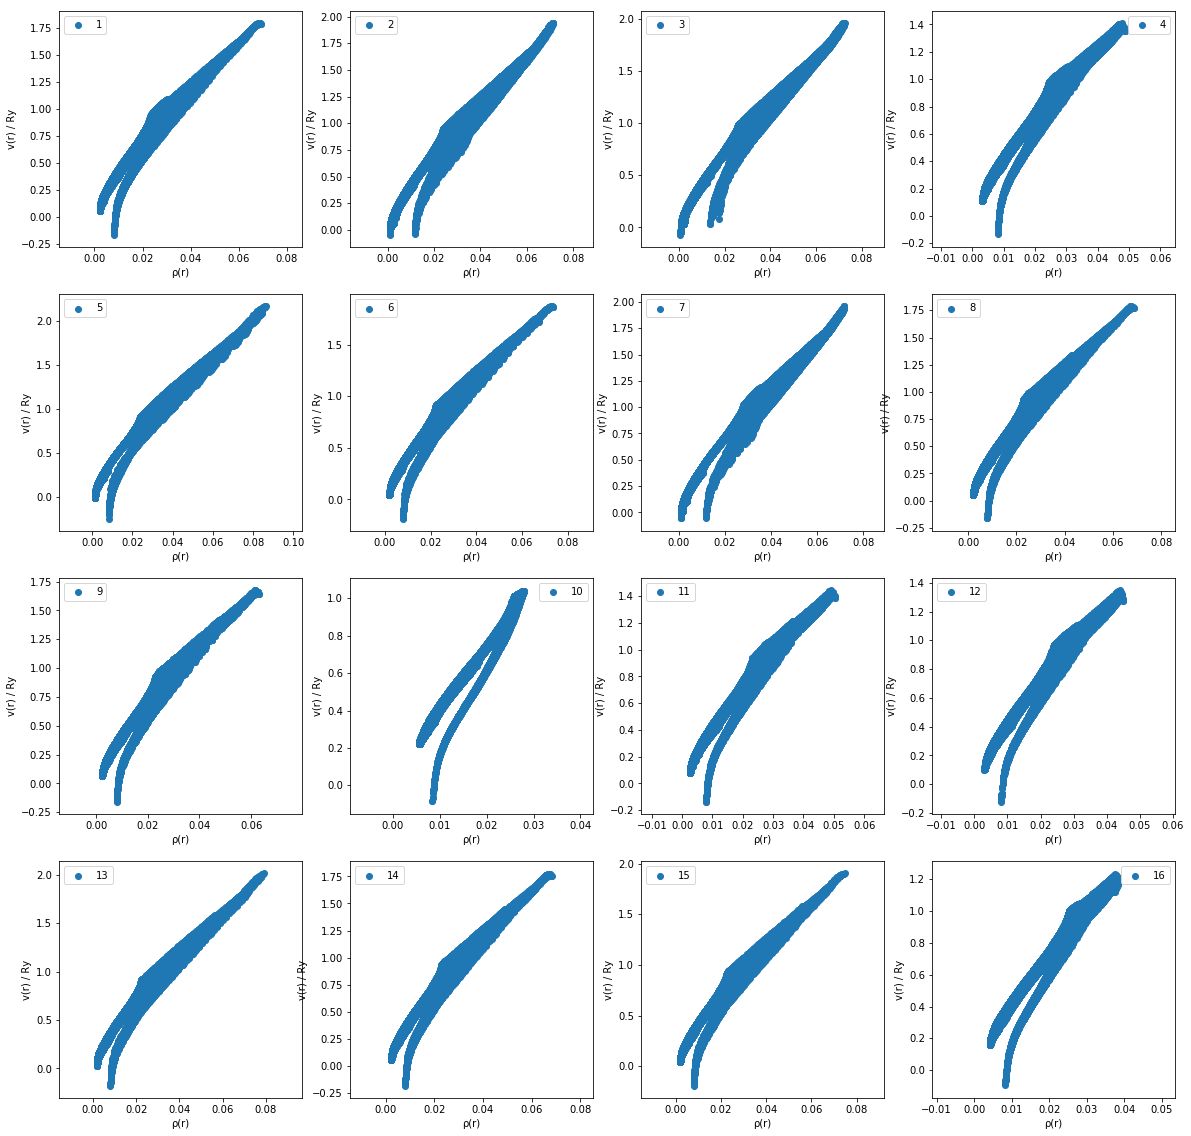

In [11]:
# Changing the size of the plot
mpl.rcParams['figure.figsize'] = (20,20)

# Plotting the first example data from the calculations
number_of_plots = 4
inner = 0
fig, axes = plt.subplots(nrows=number_of_plots,ncols=number_of_plots)
for i in range(number_of_plots):
    for j in range(number_of_plots):
        axes[i][j].scatter(X[inner],Y[inner], label = str(inner+1))
        axes[i][j].set_xlabel('ρ(r)')
        axes[i][j].set_ylabel('v(r) / Ry')
        axes[i][j].legend()
        inner += 1
plt.show()

In the next step we are initializing our training and test data for cross validation to test the following models.

In [12]:
X_train = X[0:90]
Y_train = Y[0:90]
X_test = X[90:100]
Y_test = Y[90:100]

The fist machine learning method we are using is Kernel Ridge Regression (KRR). We are trying to predict $v_\mathrm{kin}(r)$ from $\rho$ using different Kernels and $\alpha$/$\gamma$ parameters to find the combination which is predicting our test dataset best.

In [13]:
from sklearn import kernel_ridge

In [14]:
# Setting the parameters we want to test
kernels = ['laplacian','chi2','rbf']
alpha = [0.0,0.5,1.0]
gamma = [0.0,0.5,1.0]

In [15]:
# Perform the calculations and quantify the result based on mean error
score_array_2 = np.zeros((len(kernels),len(gamma),len(alpha)))
inner = 0
inner2 = 0
inner3 = 0
for j in kernels:
    inner2 = 0
    for i in gamma:
        inner3 = 0
        for h in alpha:
            model = kernel_ridge.KernelRidge(kernel = j, alpha = h, gamma=i)
            model.fit(X_train, Y_train)
            predict = model.predict(X_test)
            score = 0.1*(1/125000)*np.sum(np.abs((predict[:]-Y_test[:])/Y_test[:]))
            print('Kernel: ',j,'gamma: ',i, 'alpha:', h, 'score: ',score)
            score_array_2[inner][inner2][inner3] = score
            inner3 +=1
        inner2 += 1
    inner += 1

/home/rupali/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Kernel:  laplacian gamma:  0.0 alpha: 0.0 score:  0.221979082365
Kernel:  laplacian gamma:  0.0 alpha: 0.5 score:  0.144192040586
Kernel:  laplacian gamma:  0.0 alpha: 1.0 score:  0.14521368062
Kernel:  laplacian gamma:  0.5 alpha: 0.0 score:  0.982917677423
Kernel:  laplacian gamma:  0.5 alpha: 0.5 score:  0.988578699152
Kernel:  laplacian gamma:  0.5 alpha: 1.0 score:  0.991418672049
Kernel:  laplacian gamma:  1.0 alpha: 0.0 score:  0.998890392307
Kernel:  laplacian gamma:  1.0 alpha: 0.5 score:  0.999258257769
Kernel:  laplacian gamma:  1.0 alpha: 1.0 score:  0.999442491343
Kernel:  chi2 gamma:  0.0 alpha: 0.0 score:  0.14100073896
Kernel:  chi2 gamma:  0.0 alpha: 0.5 score:  0.146338588508
Kernel:  chi2 gamma:  0.0 alpha: 1.0 score:  0.191884896994
Kernel:  chi2 gamma:  0.5 alpha: 0.0 score:  0.14100073896
Kernel:  chi2 gamma:  0.5 alpha: 0.5 score:  0.146338588508
Kernel:  chi2 gamma:  0.5 alpha: 1.0 score:  0.191884896994
Kernel:  chi2 gamma:  1.0 alpha: 0.0 score:  0.14100073896

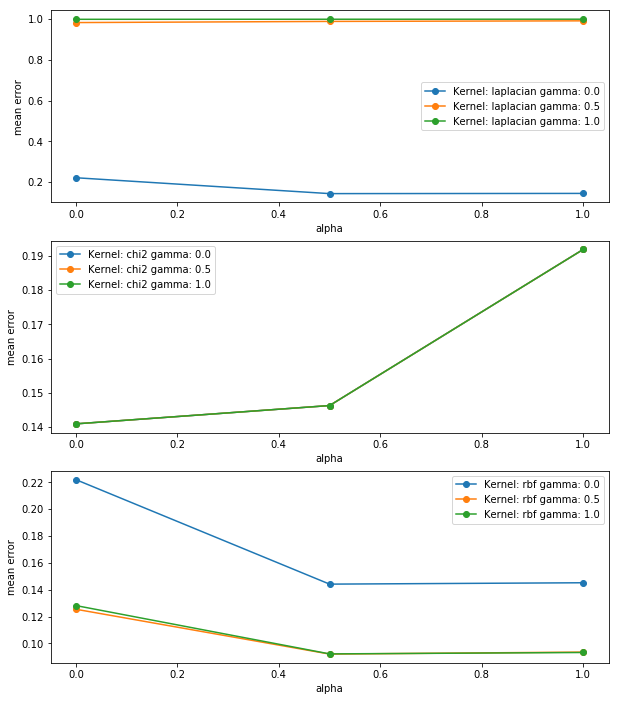

In [16]:
# Plotting the mean error values for the different combination of parameters
mpl.rcParams['figure.figsize'] = (10,12)
fig, axes = plt.subplots(nrows=3,ncols=1)
for i in range(len(kernels)):
    for j in range(len(gamma)):
        axes[i].plot(alpha,score_array_2[i][j],label = 'Kernel: '+kernels[i]+' gamma: '+str(gamma[j]), marker = 'o')
        axes[i].set_xlabel('alpha')
        axes[i].set_ylabel('mean error')
        axes[i].legend()
plt.show()

Now after we found the best performance for the different Kernels for different sets of '$\gamma$ and $\alpha$'. For this reason we illustrate the difference between the best performing Kernel with respect to the reference values for $v_\mathrm{kin}$.

In [17]:
model_rbf = kernel_ridge.KernelRidge(kernel = 'rbf', alpha = 1, gamma= 0.5)
model_laplacian = kernel_ridge.KernelRidge(kernel = 'laplacian', alpha = 0.5, gamma= 0.0)
model_chi2 = kernel_ridge.KernelRidge(kernel = 'chi2', alpha = 0, gamma= 0)

In [18]:
model_rbf.fit(X_train, Y_train)
model_laplacian.fit(X_train, Y_train)
model_chi2.fit(X_train, Y_train)

KernelRidge(alpha=0, coef0=1, degree=3, gamma=0, kernel='chi2',
      kernel_params=None)

In [19]:
pred_rbf = model_rbf.predict(X_test)
pred_laplacian = model_laplacian.predict(X_test)
pred_chi2 = model_chi2.predict(X_test)

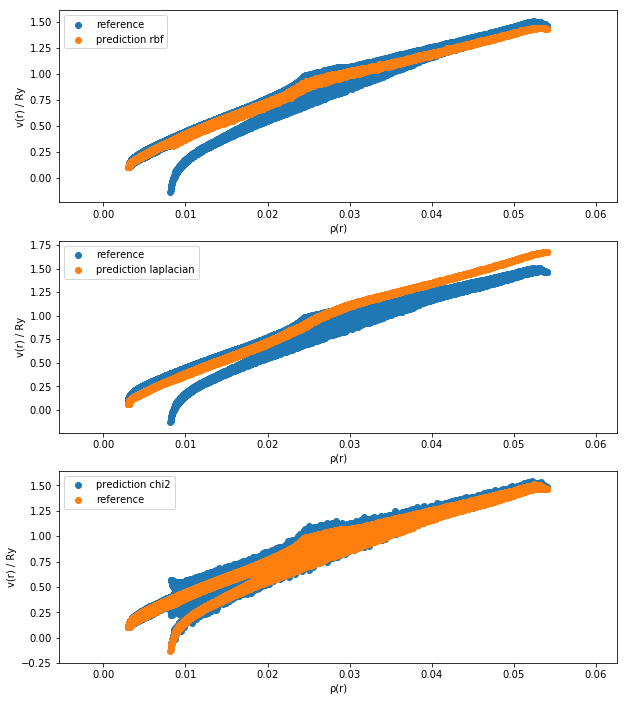

In [20]:
fig, axes = plt.subplots(nrows=3,ncols=1)

axes[0].scatter(X_test[0], Y_test[0], label = 'reference')
axes[1].scatter(X_test[0], Y_test[0], label = 'reference')
axes[0].scatter(X_test[0], pred_rbf[0], label = 'prediction rbf')
axes[1].scatter(X_test[0], pred_laplacian[0], label = 'prediction laplacian')
axes[2].scatter(X_test[0], pred_chi2[0], label = 'prediction chi2')
axes[2].scatter(X_test[0], Y_test[0], label = 'reference')

for i in range(3):
    axes[i].set_xlabel('ρ(r)')
    axes[i].set_ylabel('v(r) / Ry')
    axes[i].legend()
plt.show()

In a next step we try to use neural network. We basically run MLP Regressor in two different loops. First time we change three parameters; number of nuerons in a hidden layer, tolerance and alpha parameters.
In the second run, we loop throught the optimization solver, alpha and number of nuerons in a hidden layer. 
For each combination we calculate mean error at every data point, sum it up over grid points and then finally sum it up over the length of the test set. The mean error we define as the difference between the predicted kinetic potential value and the actual kinetic potential value.

In [21]:
from sklearn.neural_network import MLPRegressor

In [22]:
tol=[0.001, 0.0001, 0.00001]
n_layer = [(10,), (15,), (20,) ]
alpha = [0.001, 0.0001, 0.00001]
score_array_2 = np.zeros((len(tol),len(n_layer),len(alpha)))
inner = 0
inner2 = 0
inner3 = 0
for j in n_layer:
    inner2 = 0
    for i in tol:
        inner3 = 0
        for h in alpha:
            modelnn = MLPRegressor(hidden_layer_sizes= j, alpha = h, tol = i)
            modelnn.fit(X_train,Y_train)
            predict_nn = modelnn.predict(X_test)
            score = 0.1*(1/125000)*np.sum(np.abs((predict_nn[:]-Y_test[:])/Y_test[:]))
            print('n_layer: ',j,'tol: ',i, 'alpha:', h, 'score: ',score)
            score_array_2[inner][inner2][inner3] = score
            inner3 +=1
        inner2 += 1
    inner += 1

n_layer:  (10,) tol:  0.001 alpha: 0.001 score:  0.295432053721
n_layer:  (10,) tol:  0.001 alpha: 0.0001 score:  0.989432576006
n_layer:  (10,) tol:  0.001 alpha: 1e-05 score:  0.370541677108
n_layer:  (10,) tol:  0.0001 alpha: 0.001 score:  0.361543163977
n_layer:  (10,) tol:  0.0001 alpha: 0.0001 score:  0.173979754166


/home/rupali/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


n_layer:  (10,) tol:  0.0001 alpha: 1e-05 score:  0.590188845411
n_layer:  (10,) tol:  1e-05 alpha: 0.001 score:  0.289667704161
n_layer:  (10,) tol:  1e-05 alpha: 0.0001 score:  0.292994825397
n_layer:  (10,) tol:  1e-05 alpha: 1e-05 score:  0.298743358262
n_layer:  (15,) tol:  0.001 alpha: 0.001 score:  0.367706032099
n_layer:  (15,) tol:  0.001 alpha: 0.0001 score:  0.3453396334
n_layer:  (15,) tol:  0.001 alpha: 1e-05 score:  0.400777988231
n_layer:  (15,) tol:  0.0001 alpha: 0.001 score:  0.302093431883
n_layer:  (15,) tol:  0.0001 alpha: 0.0001 score:  0.359143862529
n_layer:  (15,) tol:  0.0001 alpha: 1e-05 score:  0.298290230425
n_layer:  (15,) tol:  1e-05 alpha: 0.001 score:  0.331193281303
n_layer:  (15,) tol:  1e-05 alpha: 0.0001 score:  0.399679247592
n_layer:  (15,) tol:  1e-05 alpha: 1e-05 score:  0.40093474067
n_layer:  (20,) tol:  0.001 alpha: 0.001 score:  0.365684376279
n_layer:  (20,) tol:  0.001 alpha: 0.0001 score:  0.367862505304
n_layer:  (20,) tol:  0.001 alpha:

In [23]:
n_layer = [(10,), (15,), (20,) ]
solve = ['adam','lbfgs','sgd']
alpha = [0.001, 0.0001, 0.00001]
score_array_2 = np.zeros((len(tol),len(n_layer),len(alpha)))
inner = 0
inner2 = 0
inner3 = 0
for j in n_layer:
    inner2 = 0
    for i in solve:
        inner3 = 0
        for h in alpha:
            modelnn = MLPRegressor(hidden_layer_sizes= j, alpha = h, solver = i)
            modelnn.fit(X_train,Y_train)
            predict_nn = modelnn.predict(X_test)
            score = 0.1*(1/125000)*np.sum(np.abs((predict_nn[:]-Y_test[:])/Y_test[:]))
            print('n_layer: ',j,'solver: ',i, 'alpha:', h, 'score: ',score)
            score_array_2[inner][inner2][inner3] = score
            print (score_array_2[inner][inner2][inner3])
            inner3 +=1
        inner2 += 1
    inner += 1

n_layer:  (10,) solver:  adam alpha: 0.001 score:  0.348857539118
0.348857539118
n_layer:  (10,) solver:  adam alpha: 0.0001 score:  0.331267815357
0.331267815357
n_layer:  (10,) solver:  adam alpha: 1e-05 score:  0.360552694192
0.360552694192
n_layer:  (10,) solver:  lbfgs alpha: 0.001 score:  1.00101704706
1.00101704706
n_layer:  (10,) solver:  lbfgs alpha: 0.0001 score:  1.00083468334
1.00083468334
n_layer:  (10,) solver:  lbfgs alpha: 1e-05 score:  1.00083047978
1.00083047978
n_layer:  (10,) solver:  sgd alpha: 0.001 score:  0.973141809352
0.973141809352
n_layer:  (10,) solver:  sgd alpha: 0.0001 score:  0.970359535122
0.970359535122
n_layer:  (10,) solver:  sgd alpha: 1e-05 score:  0.969692447787
0.969692447787
n_layer:  (15,) solver:  adam alpha: 0.001 score:  0.334308681018
0.334308681018
n_layer:  (15,) solver:  adam alpha: 0.0001 score:  0.378193775371
0.378193775371
n_layer:  (15,) solver:  adam alpha: 1e-05 score:  0.333165920074
0.333165920074
n_layer:  (15,) solver:  lbfgs

adam (10,) [ 0.34885754  0.33126782  0.36055269]
adam (15,) [ 1.00101705  1.00083468  1.00083048]
adam (20,) [ 0.97314181  0.97035954  0.96969245]
lbfgs (10,) [ 0.33430868  0.37819378  0.33316592]
lbfgs (15,) [ 1.00083179  1.00070851  1.00066836]
lbfgs (20,) [ 0.97105715  0.97210148  0.97370131]
sgd (10,) [ 0.3485756   0.33022573  0.38939061]
sgd (15,) [ 1.00081286  1.0008536   1.00092583]
sgd (20,) [ 0.97140454  0.97368018  0.97327778]


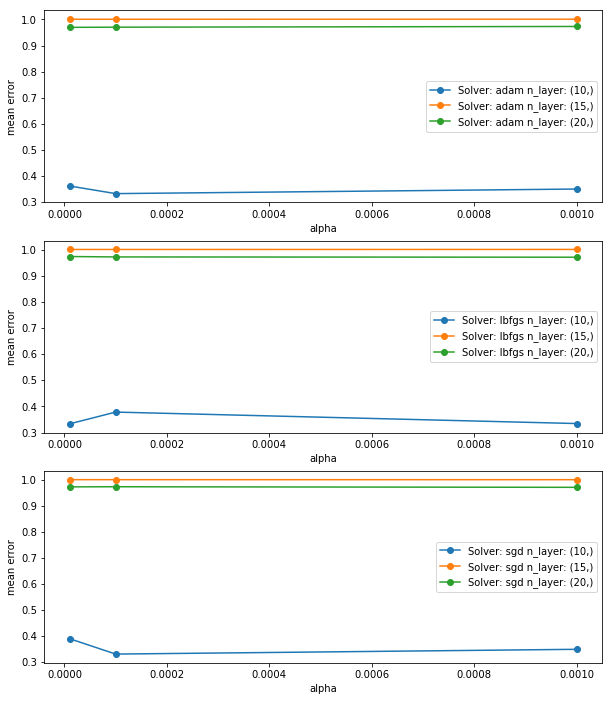

In [24]:
mpl.rcParams['figure.figsize'] = (10,12)
fig, axes = plt.subplots(nrows=3,ncols=1)
for i in range(len(solve)):
    for j in range(len(n_layer)):
        print (solve[i],n_layer[j], score_array_2[i][j])
        axes[i].plot(alpha,score_array_2[i][j],label = 'Solver: '+solve[i]+' n_layer: '+str(n_layer[j]), marker = 'o')
        axes[i].set_xlabel('alpha')
        axes[i].set_ylabel('mean error')
        axes[i].legend()
plt.show()

###  Conclusion  <a name="paragraph6"></a>

Based on our score values, Kernel Ridge Regressor works better than the MLPRegressor of Nueral Networks method.


The data set in this project was generated from scratch in the PRG lab. This presentation today is a part of a very diverse project where our research group aims to achieve something that has not done before.
The analysis presented today is just the step one towards exploring the domain of calculating kinetic potentials with just the electron density.  In future, we aim to use deep learning in a combination with convolutional neural network to obtain much better predictions of the kinetic potentials. If successful, this would lead to a breakthrough in electronic structure caculations with application from organic synthesis, material science to biochemistry.